<a href="https://colab.research.google.com/github/Techie-Aquib/FMML_Labs_and_Assignments/blob/main/FMML_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1

In [1]:
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

  Preparing metadata (setup.py) ... done


# Part 1: Features of text

Computures can't understand text. They can only process numbers. So, the logical first step in any attempt to analyze text is to convert it into numbers. This process is called **feature extraction** or **vectorization**. In this lab, we will try some simple methods for feature extraction.

First, let us download a 2 documents from Wikipedia in two different languages, English and French. We will then extract features from the text in these documents.

In [2]:
topic1 = "Giraffe"
topic2 = "Elephant"

wikipedia.set_lang("en")

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang("fr")

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like in English:

In [3]:
# eng1[:1000]
eng2[:500]

'Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant (Loxodonta africana), the African forest elephant (L. cyclotis), and the Asian elephant (Elephas maximus). They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but se'

This is what the text looks like in French:

In [4]:
fr1[:500]
# fr2[:1000]

"La Girafe (Giraffa camelopardalis) est une espèce de mammifères ongulés artiodactyles, du groupe des ruminants, vivant dans les savanes africaines et répandue du Tchad jusqu'en Afrique du Sud. Son nom commun vient de l'arabe زرافة, zarāfah, mais l'animal fut anciennement appelé camélopard, du latin camelopardus, contraction de camelus (chameau) en raison du long cou et de pardus (léopard) en raison des taches recouvrant son corps. Après des millions d'années d'évolution, la girafe a acquis une a"

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [5]:
def cleanup(text):
    text = text.lower()  # make it lowercase
    text = re.sub(
        r"[^a-z\s]", "", text
    )  # only keep characters in a-z range and whitespaces
    return text

In [6]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [7]:
eng2[:500]

'elephants are the largest living land animals three living species are currently recognised the african bush elephant loxodonta africana the african forest elephant l cyclotis and the asian elephant elephas maximus they are the only surviving members of the family elephantidae and the order proboscidea extinct relatives include mammoths and mastodons distinctive features of elephants include a long proboscis called a trunk tusks large ear flaps pillarlike legs and tough but sensitive grey skin t'

In [8]:
fr2[:500]

'les lphants sont des mammifres proboscidiens de la famille des lphantids ils correspondent aujourdhui  trois espces rparties en deux genres distincts llphant de savane dafrique et llphant de fort dafrique autrefois regroups sous la mme espce d lphant dafrique  appartiennent au genre loxodonta tandis que llphant dasie anciennement appel  lphant indien  appartient au genre elephas ils se diffrencient par certaines caractristiques anatomiques les lphants dasie tant en gnral plus petits avec des ore'

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [9]:
def tuple2string(tup):
    # convert a tuple of characters to a string
    # ('t', 'h') - > 'th'
    st = ""
    for ii in tup:
        st = st + ii
    return st


def key2string(keys):
    # convert a tuple of tuples to a list of strings
    # [('t', 'h'), ('h', 'e')] -> ['th', 'he']
    # [('t')] - >['t']
    return [tuple2string(i) for i in keys]


def get_ngram_freq(ngram):
    # get the frequency of ngrams
    # sort the keys in alphabetic order
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

Let us compare the histograms of English pages and French pages. Can you spot a difference?

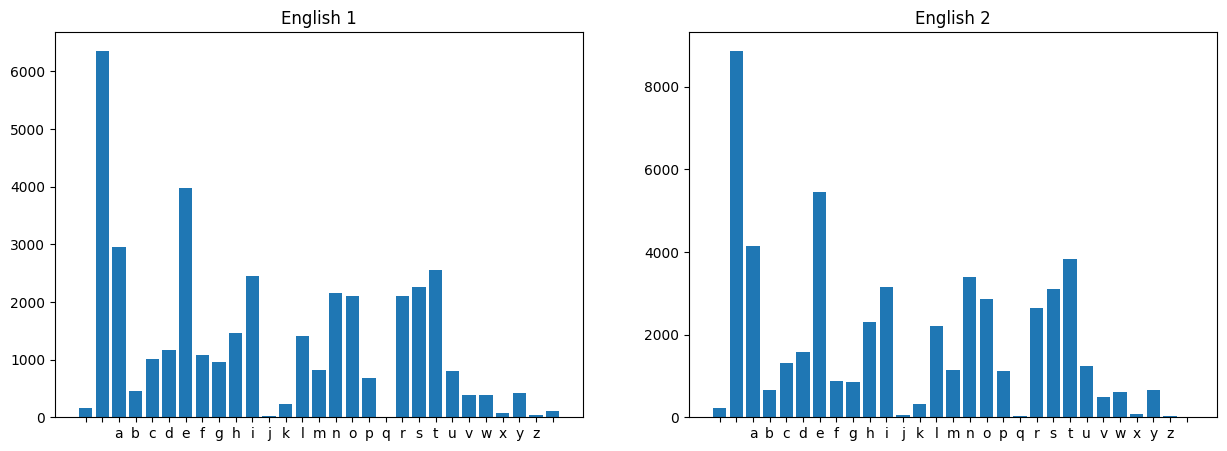

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_eng1 = Counter(ngrams(eng1, 1))
# print(unigram_eng1.items())
keys, values = get_ngram_freq(unigram_eng1)
axs[0].bar(keys, values)
axs[0].set_title("English 1")

unigram_eng2 = Counter(ngrams(eng2, 1))
keys, values = get_ngram_freq(unigram_eng2)
axs[1].bar(keys, values)
axs[1].set_title("English 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


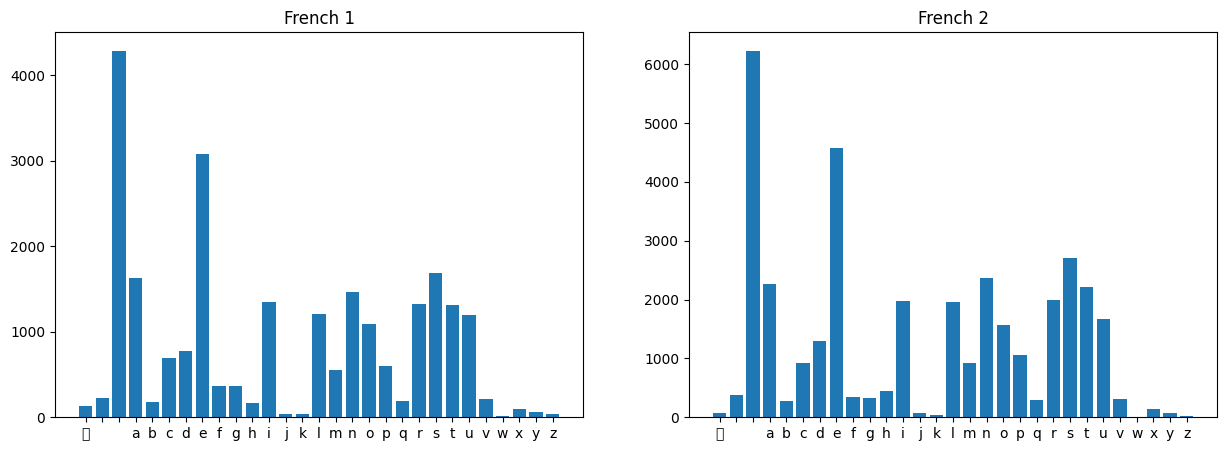

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_fr1 = Counter(ngrams(fr1, 1))
keys, values = get_ngram_freq(unigram_fr1)
axs[0].bar(keys, values)
axs[0].set_title("French 1")

unigram_fr2 = Counter(ngrams(fr2, 1))
keys, values = get_ngram_freq(unigram_fr2)
axs[1].bar(keys, values)
axs[1].set_title("French 2")
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

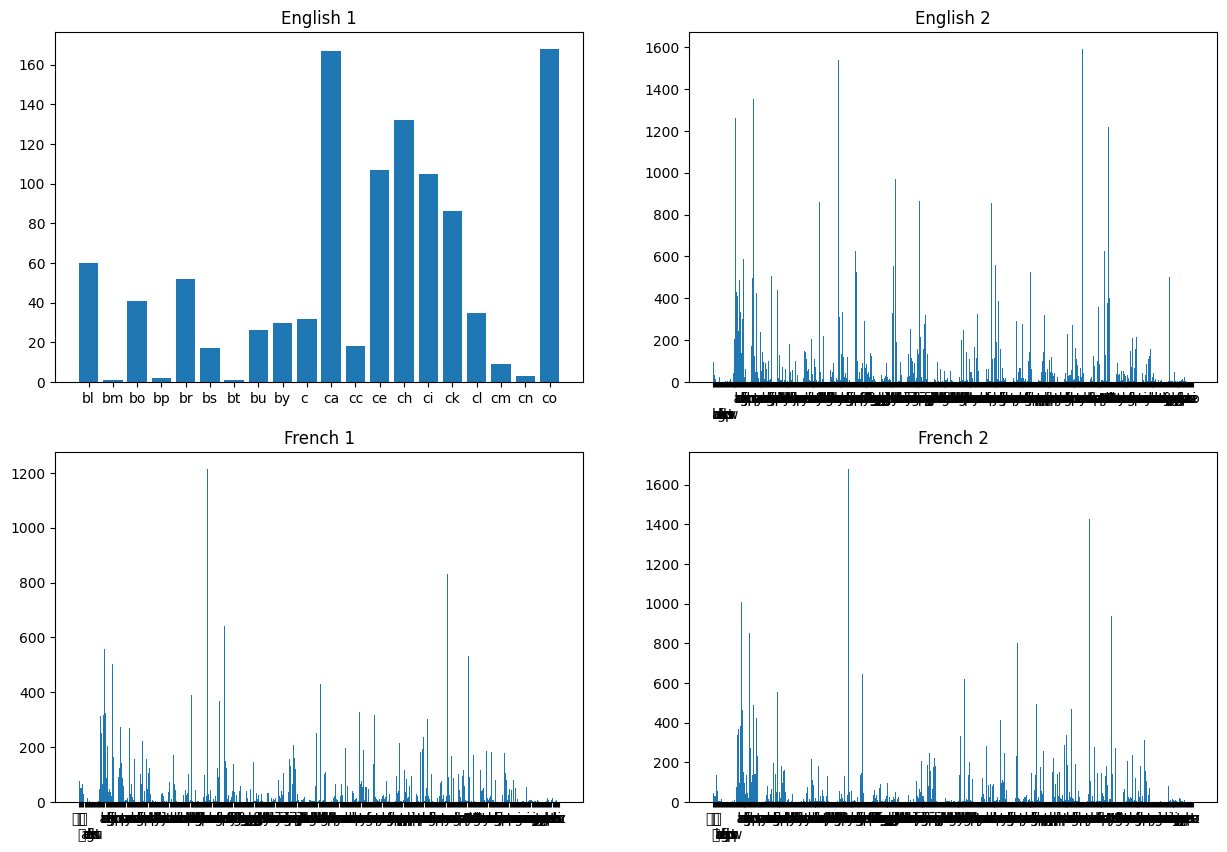

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1 = Counter(ngrams(eng1, 2))
keys, values = get_ngram_freq(bigram_eng1)
#print(keys[:100])
axs[0, 0].bar(keys[80:100], values[80:100])
axs[0, 0].set_title("English 1")

bigram_eng2 = Counter(ngrams(eng2, 2))
keys, values = get_ngram_freq(bigram_eng2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

bigram_fr1 = Counter(ngrams(fr1, 2))
keys, values = get_ngram_freq(bigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

bigram_fr2 = Counter(ngrams(fr2, 2))
keys, values = get_ngram_freq(bigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [23]:
def get_2D_ngram_freq(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26):
        for jj in range(26):
            freq[ii, jj] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj))]
    return freq

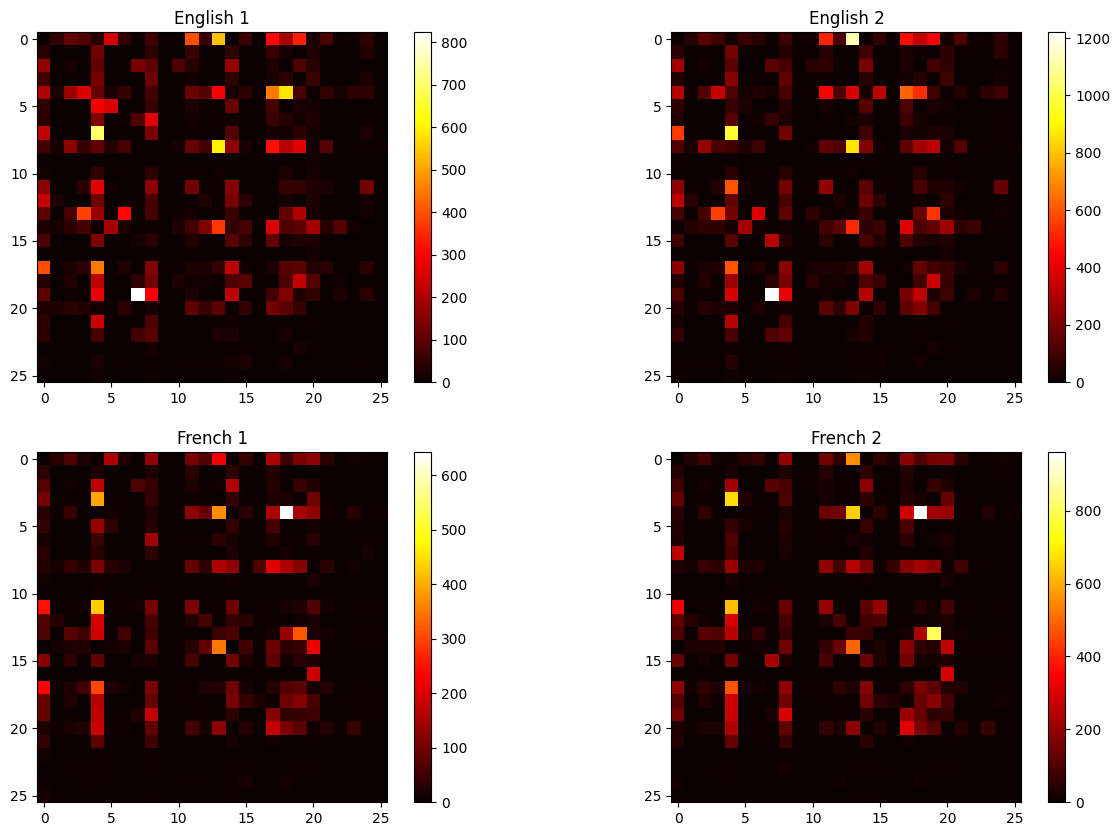

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1_freq = get_2D_ngram_freq(bigram_eng1)
fig.colorbar(axs[0, 0].imshow(bigram_eng1_freq, cmap="hot"), ax=axs[0, 0])
axs[0, 0].set_title("English 1")

bigram_eng2_freq = get_2D_ngram_freq(bigram_eng2)
fig.colorbar(axs[0, 1].imshow(bigram_eng2_freq, cmap="hot"), ax=axs[0, 1])
axs[0, 1].set_title("English 2")

bigram_fr1_freq = get_2D_ngram_freq(bigram_fr1)
fig.colorbar(axs[1, 0].imshow(bigram_fr1_freq, cmap="hot"), ax=axs[1, 0])
axs[1, 0].set_title("French 1")

bigram_fr2_freq = get_2D_ngram_freq(bigram_fr2)
fig.colorbar(axs[1, 1].imshow(bigram_fr2_freq, cmap="hot"), ax=axs[1, 1])
axs[1, 1].set_title("French 2")
plt.show()

Let us look at the top 10 ngrams for each text.

In [19]:
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j))


def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [25]:
print("\nEnglish 1:")
ShowTopN(bigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(bigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(bigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(bigram_fr2_freq)


English 1:
('t', 'h') : 823.0
('h', 'e') : 697.0
('i', 'n') : 601.0
('e', 's') : 579.0
('a', 'n') : 539.0
('e', 'r') : 451.0
('r', 'e') : 449.0
('r', 'a') : 396.0
('a', 'l') : 396.0
('n', 'd') : 380.0

English 2:
('t', 'h') : 1220.0
('a', 'n') : 1122.0
('h', 'e') : 970.0
('i', 'n') : 867.0
('e', 'r') : 628.0
('r', 'e') : 599.0
('l', 'e') : 597.0
('n', 'd') : 561.0
('h', 'a') : 552.0
('n', 't') : 540.0

French 1:
('e', 's') : 642.0
('l', 'e') : 431.0
('d', 'e') : 392.0
('e', 'n') : 370.0
('o', 'n') : 348.0
('n', 't') : 318.0
('r', 'e') : 301.0
('l', 'a') : 250.0
('r', 'a') : 237.0
('a', 'n') : 223.0

French 2:
('e', 's') : 960.0
('n', 't') : 801.0
('d', 'e') : 671.0
('e', 'n') : 646.0
('l', 'e') : 620.0
('a', 'n') : 554.0
('o', 'n') : 494.0
('r', 'e') : 469.0
('l', 'a') : 333.0
('u', 'r') : 311.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

> Exercise: Try to extract trigrams and visualize the top 10 trigrams for each text.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



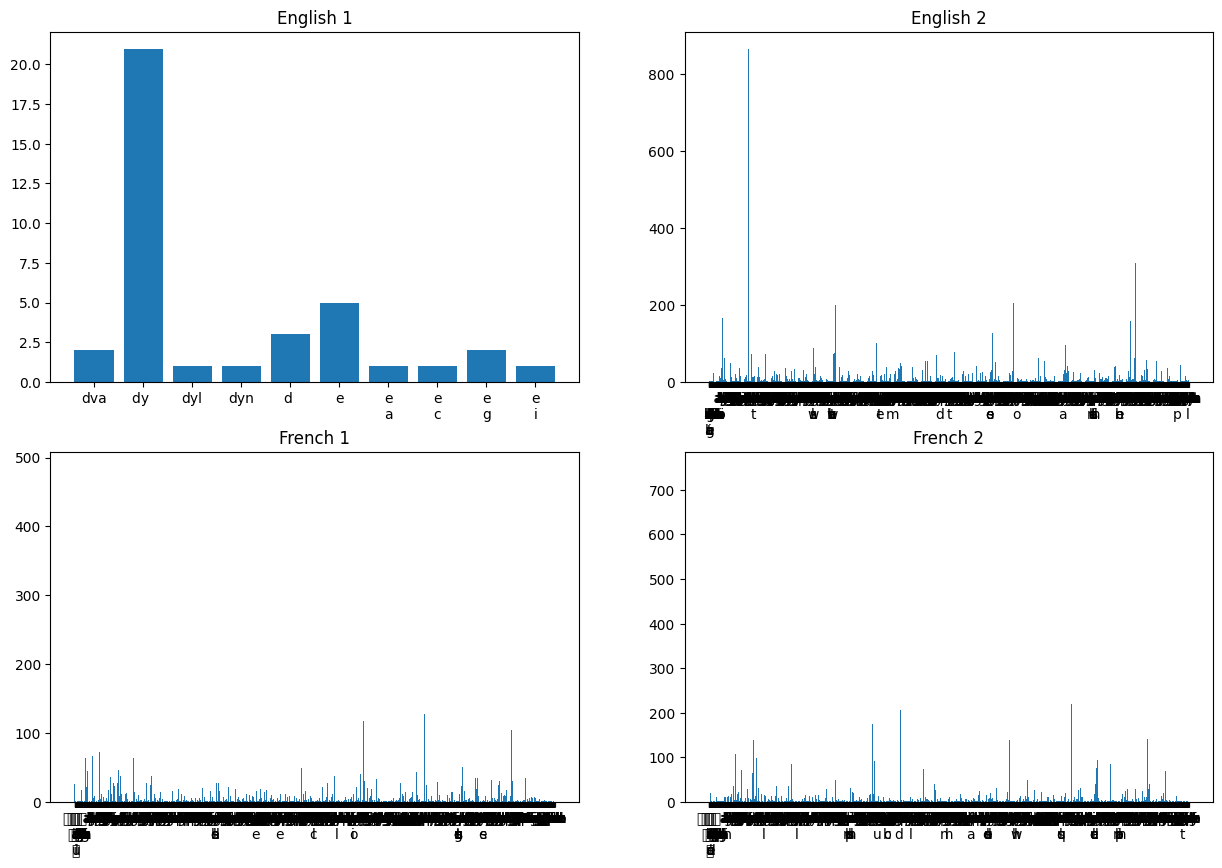

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
trigram_eng1 = Counter(ngrams(eng1, 3))
keys, values = get_ngram_freq(trigram_eng1)
#print(keys[:100])
axs[0, 0].bar(keys[800:810], values[800:810])
axs[0, 0].set_title("English 1")

trigram_eng2 = Counter(ngrams(eng2, 3))
keys, values = get_ngram_freq(trigram_eng2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

trigram_fr1 = Counter(ngrams(fr1, 3))
keys, values = get_ngram_freq(trigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

trigram_fr2 = Counter(ngrams(fr2, 3))
keys, values = get_ngram_freq(trigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

In [51]:
def get_3D_ngram_freq(ngram):
    freq = np.zeros((26, 26, 26))
    for ii in range(26):
        for jj in range(26):
            for kk in range(26):
                freq[ii, jj, kk] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj), chr(ord("a") + kk))]
    return freq

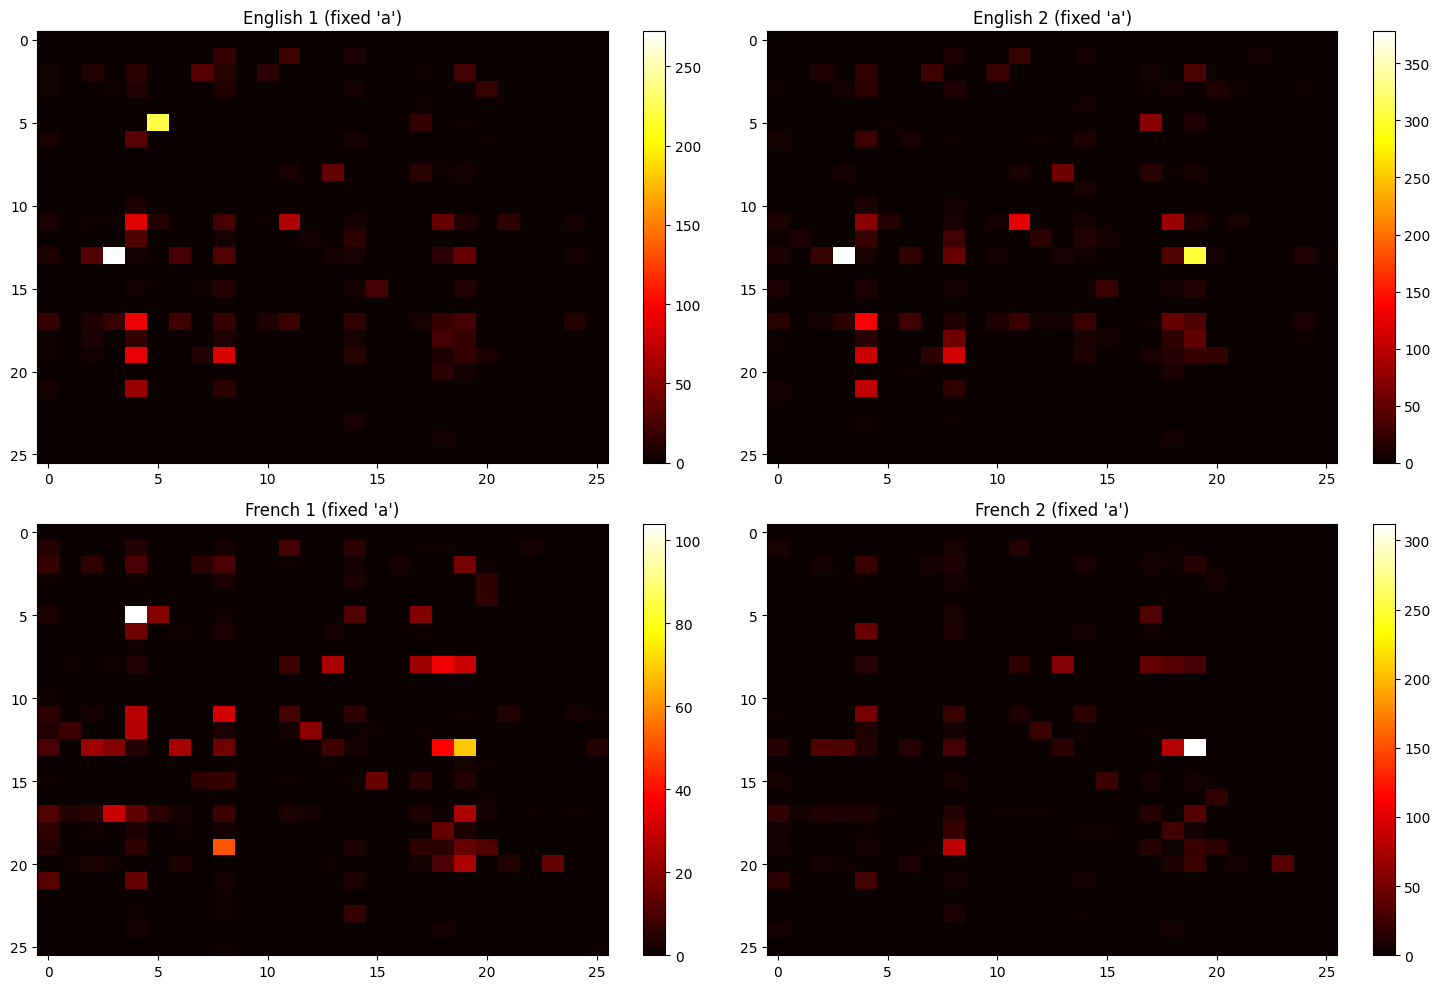

In [55]:
trigram_eng1_freq = get_3D_ngram_freq(trigram_eng1)
trigram_eng2_freq = get_3D_ngram_freq(trigram_eng2)
trigram_fr1_freq = get_3D_ngram_freq(trigram_fr1)
trigram_fr2_freq = get_3D_ngram_freq(trigram_fr2)

def plot_trigram_slice(trigram_freq, ax, title, fixed_index):
    slice_freq = trigram_freq[fixed_index, :, :]
    cax = ax.imshow(slice_freq, cmap="hot", aspect="auto")
    fig.colorbar(cax, ax=ax)
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Choose a fixed index for the first character ('a' corresponds to 0, 'b' to 1, etc.)
fixed_index = 0  # Fixes the first letter to 'a'

plot_trigram_slice(trigram_eng1_freq, axs[0, 0], "English 1 (fixed 'a')", fixed_index)
plot_trigram_slice(trigram_eng2_freq, axs[0, 1], "English 2 (fixed 'a')", fixed_index)
plot_trigram_slice(trigram_fr1_freq, axs[1, 0], "French 1 (fixed 'a')", fixed_index)
plot_trigram_slice(trigram_fr2_freq, axs[1, 1], "French 2 (fixed 'a')", fixed_index)

plt.tight_layout()
plt.show()


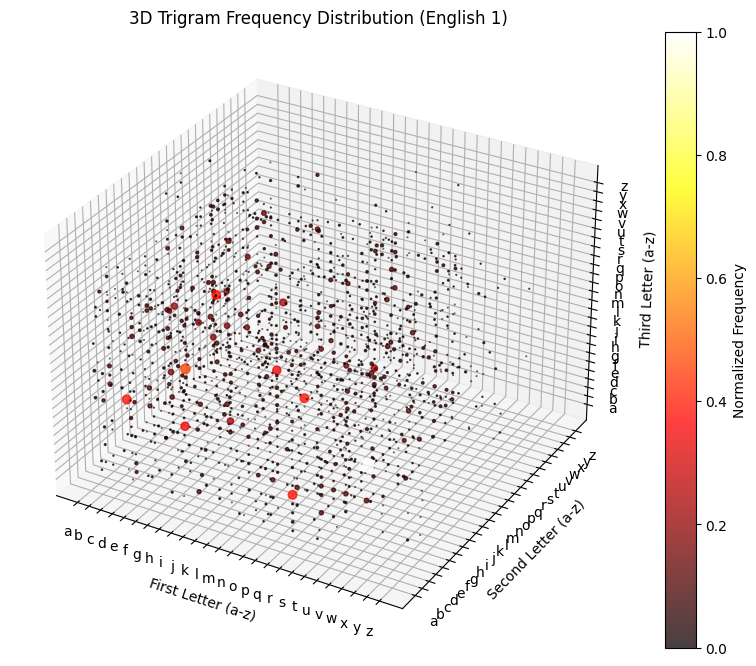

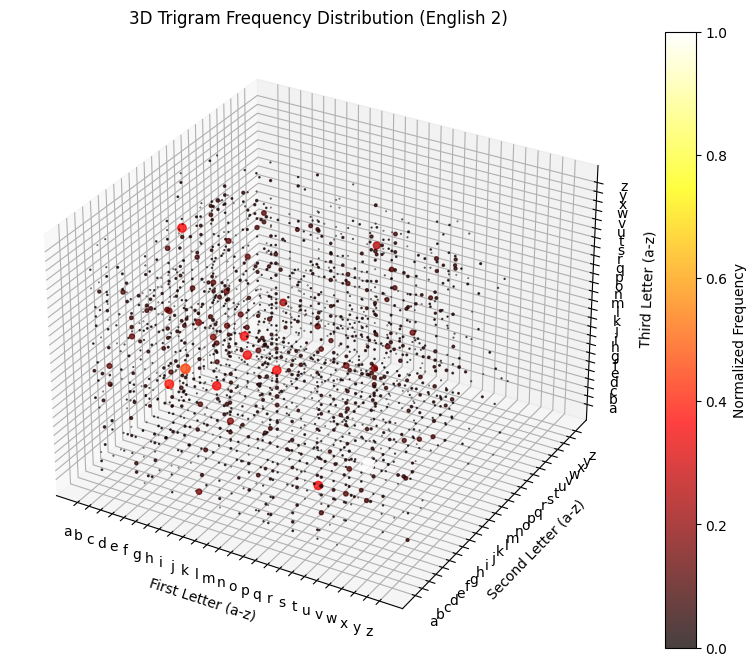

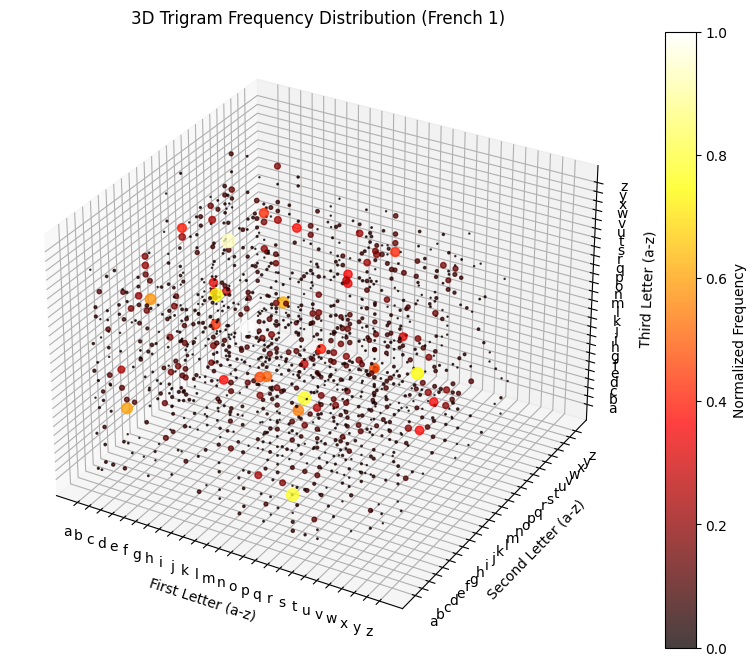

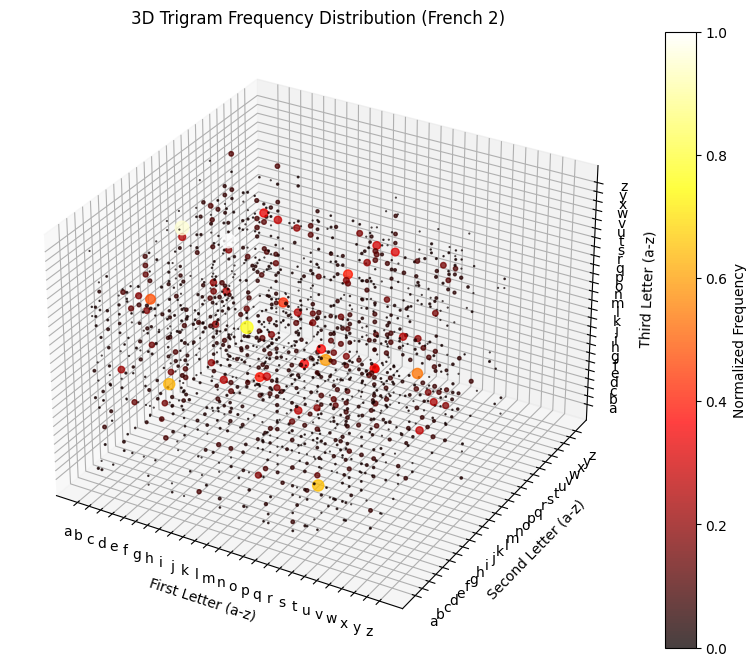

In [57]:
# Exploring 3D graph so that we do not fix any index
def plot_3d_trigram_freq(trigram_freq, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create arrays for X, Y, Z axes and the corresponding frequency values
    x, y, z, freq = [], [], [], []

    # Populate these arrays by iterating over the 3D frequency matrix
    for ii in range(26):
        for jj in range(26):
            for kk in range(26):
                if trigram_freq[ii, jj, kk] > 0:  # Only plot trigrams with non-zero frequency
                    x.append(ii)
                    y.append(jj)
                    z.append(kk)
                    freq.append(trigram_freq[ii, jj, kk])

    # Convert to NumPy arrays
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    freq = np.array(freq)

    # Normalize the frequencies for better visualization
    freq_normalized = (freq - np.min(freq)) / (np.max(freq) - np.min(freq))

    # Plot the scatter plot with frequencies affecting the size and color of the points
    sc = ax.scatter(x, y, z, c=freq_normalized, s=freq_normalized * 100, cmap="hot", alpha=0.75)

    # Set labels and title
    ax.set_xlabel('First Letter (a-z)')
    ax.set_ylabel('Second Letter (a-z)')
    ax.set_zlabel('Third Letter (a-z)')
    ax.set_title(title)

    # Customize the ticks to show letters instead of numbers
    ax.set_xticks(np.arange(26))
    ax.set_yticks(np.arange(26))
    ax.set_zticks(np.arange(26))
    ax.set_xticklabels([chr(ord('a') + i) for i in range(26)])
    ax.set_yticklabels([chr(ord('a') + i) for i in range(26)])
    ax.set_zticklabels([chr(ord('a') + i) for i in range(26)])

    # Add a color bar to show the frequency scale
    cbar = plt.colorbar(sc)
    cbar.set_label('Normalized Frequency')

    plt.show()


plot_3d_trigram_freq(trigram_eng1_freq, "3D Trigram Frequency Distribution (English 1)")
plot_3d_trigram_freq(trigram_eng2_freq, "3D Trigram Frequency Distribution (English 2)")
plot_3d_trigram_freq(trigram_fr1_freq, "3D Trigram Frequency Distribution (French 1)")
plot_3d_trigram_freq(trigram_fr2_freq, "3D Trigram Frequency Distribution (French 2)")

In [61]:
def ind2tup_trigram(ind):
    ind = int(ind)
    i = int(ind / (26 * 26))
    remainder = ind % (26 * 26)
    j = int(remainder / 26)
    k = int(remainder % 26)
    return (chr(ord("a") + i), chr(ord("a") + j), chr(ord("a") + k))

def ShowTopN_tri(trifreq, n=10):
    f = trifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup_trigram(arg[ii])} : {f[arg[ii]]}")

In [62]:
print("\nEnglish 1:")
ShowTopN_tri(trigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN_tri(trigram_eng2_freq)

print("\nFrench 1:")
ShowTopN_tri(trigram_fr1_freq)

print("\nFrench 2:")
ShowTopN_tri(trigram_fr2_freq)


English 1:
('t', 'h', 'e') : 589.0
('a', 'n', 'd') : 272.0
('i', 'r', 'a') : 229.0
('r', 'a', 'f') : 227.0
('g', 'i', 'r') : 225.0
('a', 'f', 'f') : 223.0
('f', 'f', 'e') : 205.0
('i', 'n', 'g') : 202.0
('i', 'o', 'n') : 140.0
('m', 'a', 'l') : 123.0

English 2:
('t', 'h', 'e') : 828.0
('a', 'n', 'd') : 378.0
('h', 'a', 'n') : 318.0
('a', 'n', 't') : 304.0
('i', 'n', 'g') : 295.0
('e', 'l', 'e') : 293.0
('p', 'h', 'a') : 292.0
('e', 'p', 'h') : 285.0
('l', 'e', 'p') : 285.0
('n', 't', 's') : 205.0

French 1:
('l', 'e', 's') : 172.0
('e', 'n', 't') : 161.0
('r', 'a', 'f') : 134.0
('i', 'r', 'a') : 133.0
('g', 'i', 'r') : 130.0
('q', 'u', 'e') : 128.0
('i', 'o', 'n') : 108.0
('a', 'f', 'e') : 104.0
('d', 'e', 's') : 100.0
('l', 'l', 'e') : 95.0

French 2:
('e', 'n', 't') : 326.0
('a', 'n', 't') : 312.0
('l', 'e', 's') : 251.0
('p', 'h', 'a') : 212.0
('h', 'a', 'n') : 206.0
('l', 'p', 'h') : 195.0
('q', 'u', 'e') : 175.0
('d', 'e', 's') : 157.0
('i', 'o', 'n') : 139.0
('o', 'n', 't') : 1

# Part 2: Written numbers

We've seen how to extract features from text. Now let us see how to extract features from images. We will use the MNIST dataset which contains images of handwritten numbers. Each image is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

In [33]:
!pip install keras tensorflow

In [26]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Extract a subset of the data for our experiment:

In [30]:
no1 = train_X[train_y == 1, :, :]
no0 = train_X[train_y == 0, :, :]
no2 = train_X[train_y == 2, :, :]
no3 = train_X[train_y == 3, :, :]
no4 = train_X[train_y == 4, :, :]

Let us visualize a few images here:

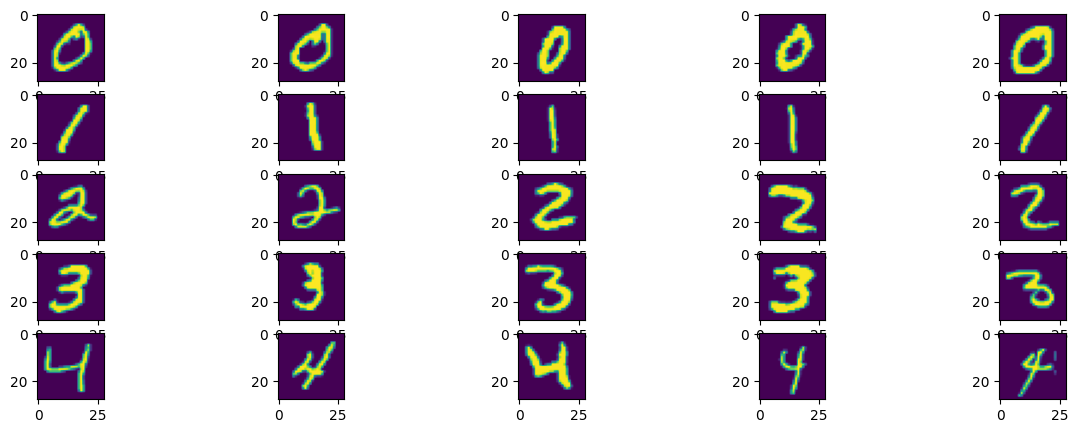

In [32]:
fig, axs = plt.subplots(5, 5, figsize=(15, 5))

for ii in range(5):
    axs[0, ii].imshow(no0[ii, :, :])

for ii in range(5):
    axs[1, ii].imshow(no1[ii, :, :])

for ii in range(5):
    axs[2, ii].imshow(no2[ii, :, :])

for ii in range(5):
    axs[3, ii].imshow(no3[ii, :, :])

for ii in range(5):
    axs[4, ii].imshow(no4[ii, :, :])

plt.show()

Now, let us start with a simple feature: the sum of all pixels. Let's see how good this feature is.

In [34]:
sum1 = np.sum(no1 > 0, (1, 2))  # threshold before adding up
sum0 = np.sum(no0 > 0, (1, 2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

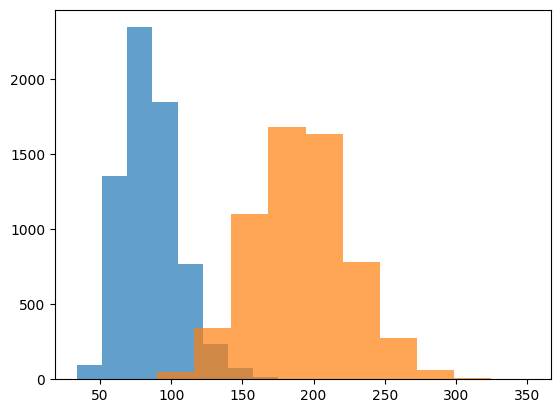

In [35]:
plt.hist(sum1, alpha=0.7)
plt.hist(sum0, alpha=0.7)
plt.show()

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [36]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = (
            img2[ii, :] + img2[ii - 1, :]
        )  # for every row, add up all the rows above it.
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole

Visualize a few. First row has the original zero number images and the second row has the hole pixels. Thrid row has original one number images and the last row has corresponding hole pixels which are non-existent, as expected.

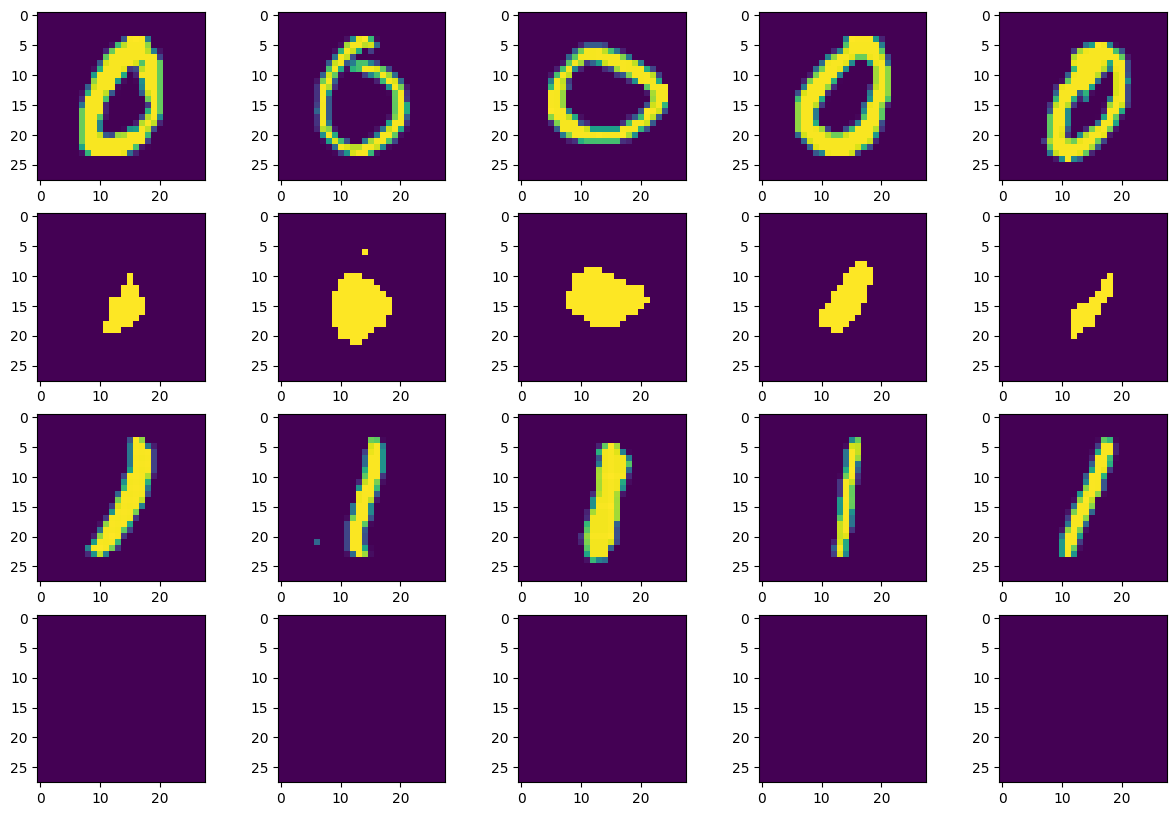

In [37]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHolePixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHolePixels(no1[idx, :, :]))

Now let us plot the number of hole pixels and see how this feature behaves

(array([ 163.,  663., 1199., 1355., 1138.,  834.,  401.,  127.,   36.,
           7.]),
 array([  0. ,  18.9,  37.8,  56.7,  75.6,  94.5, 113.4, 132.3, 151.2,
        170.1, 189. ]),
 <BarContainer object of 10 artists>)

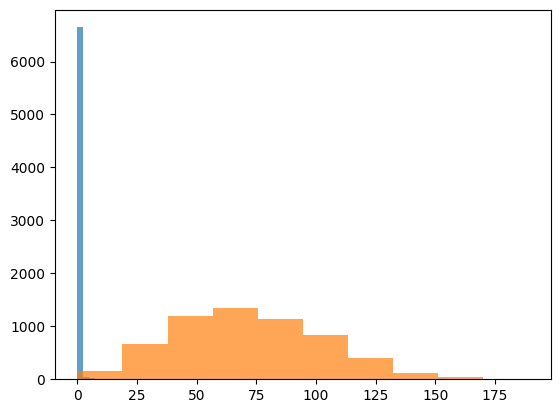

In [38]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7)
plt.hist(hole0, alpha=0.7)

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [39]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    return hull

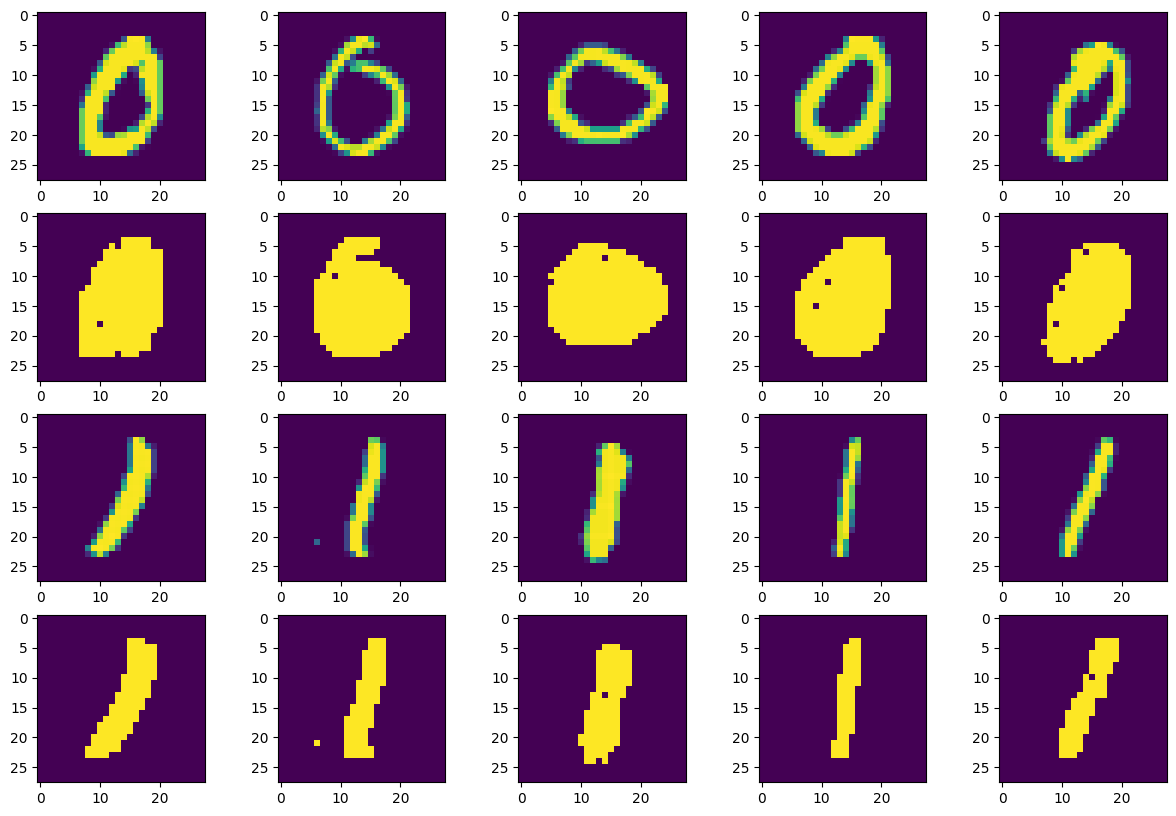

In [40]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHullPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHullPixels(no1[idx, :, :]))

Plotting the number of hull pixels versus the digit:

(array([  10.,   64.,  245.,  611., 1042., 1379., 1395.,  917.,  251.,
           9.]),
 array([113. , 139.3, 165.6, 191.9, 218.2, 244.5, 270.8, 297.1, 323.4,
        349.7, 376. ]),
 <BarContainer object of 10 artists>)

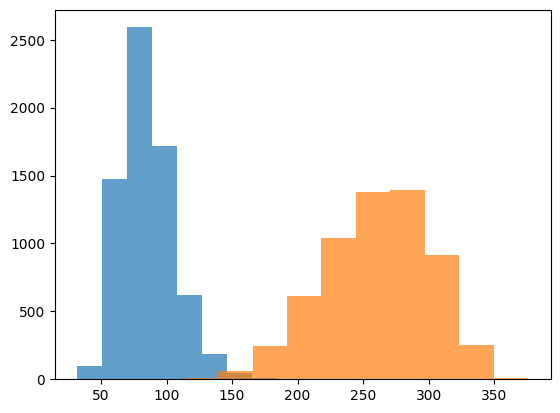

In [41]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7)
plt.hist(hull0, alpha=0.7)

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [42]:
def minus(a, b):
    return a & ~b


def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

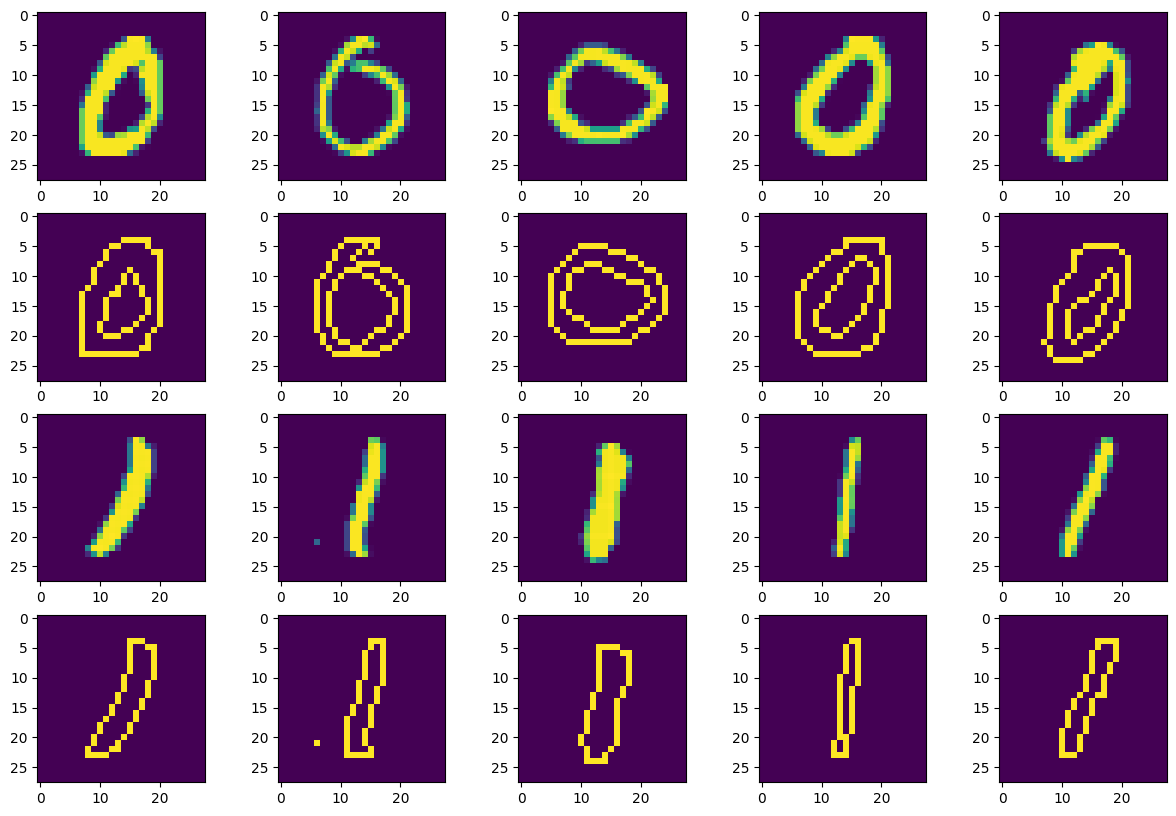

In [43]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getBoundaryPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getBoundaryPixels(no1[idx, :, :]))

(array([  14.,   21.,   99.,  450., 1300., 2262., 1339.,  375.,   52.,
          11.]),
 array([ 48. ,  55.2,  62.4,  69.6,  76.8,  84. ,  91.2,  98.4, 105.6,
        112.8, 120. ]),
 <BarContainer object of 10 artists>)

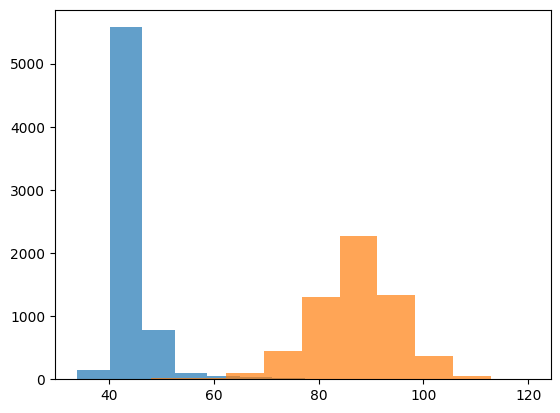

In [45]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7)
plt.hist(bound0, alpha=0.7)

What will happen if we plot two features together?

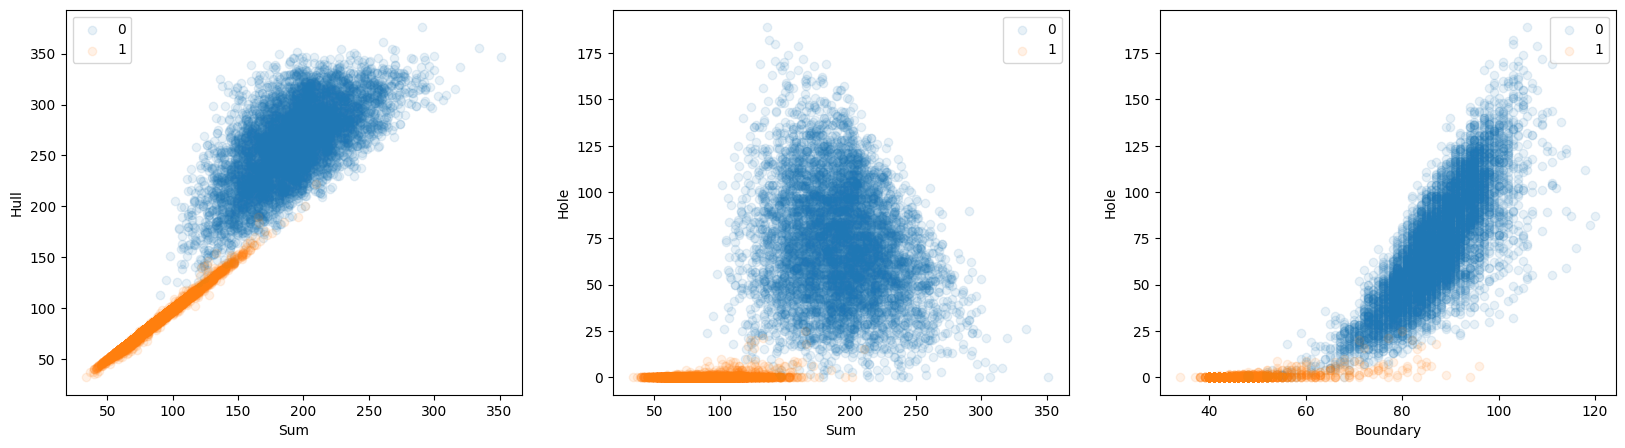

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(sum0, hull0, alpha=0.1)
axs[0].scatter(sum1, hull1, alpha=0.1)
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend(["0", "1"])

axs[1].scatter(sum0, hole0, alpha=0.1)
axs[1].scatter(sum1, hole1, alpha=0.1)
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].legend(["0", "1"])

axs[2].scatter(bound0, hole0, alpha=0.1)
axs[2].scatter(bound1, hole1, alpha=0.1)
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend(["0", "1"])
plt.show()

Now let us try plotting 3 features together.

In [90]:
cl1 = ["class 1"] * len(sum1)
cl0 = ["class 0"] * len(sum0)
df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole1, hole0)),
            np.concatenate((sum1, sum0)),
            np.concatenate((bound1, bound0)),
            np.concatenate((cl1, cl0)),
        )
    ),

    columns=["Hole", "Sum", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

> Exercise: Remember we took a subset of only the first two numbers in MNIST? Include 5 or more numbers now and try to visualise which feature works best when multiple numbers are involved. Brownie points if you use all numbers :)

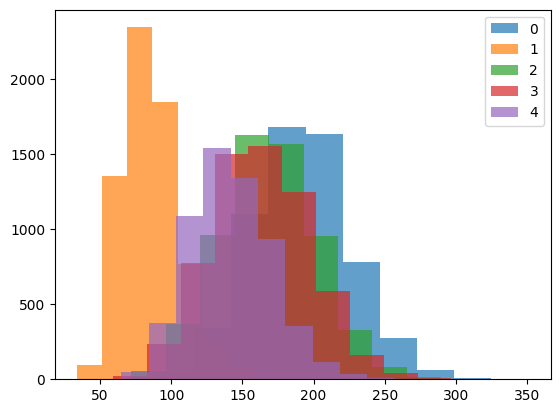

In [88]:
sum1 = np.sum(no1 > 0, (1, 2))  # threshold before adding up
sum0 = np.sum(no0 > 0, (1, 2))
sum2 = np.sum(no2 > 0, (1, 2))
sum3 = np.sum(no3 > 0, (1, 2))
sum4 = np.sum(no4 > 0, (1, 2))


plt.hist(sum0, alpha=0.7)
plt.hist(sum1, alpha=0.7)
plt.hist(sum2, alpha=0.7)
plt.hist(sum3, alpha=0.7)
plt.hist(sum4, alpha=0.7)
plt.legend(["0", "1", "2", "3", "4"])
plt.show()

We can infer that this feature clearly does not help us to distinguish between the numbers

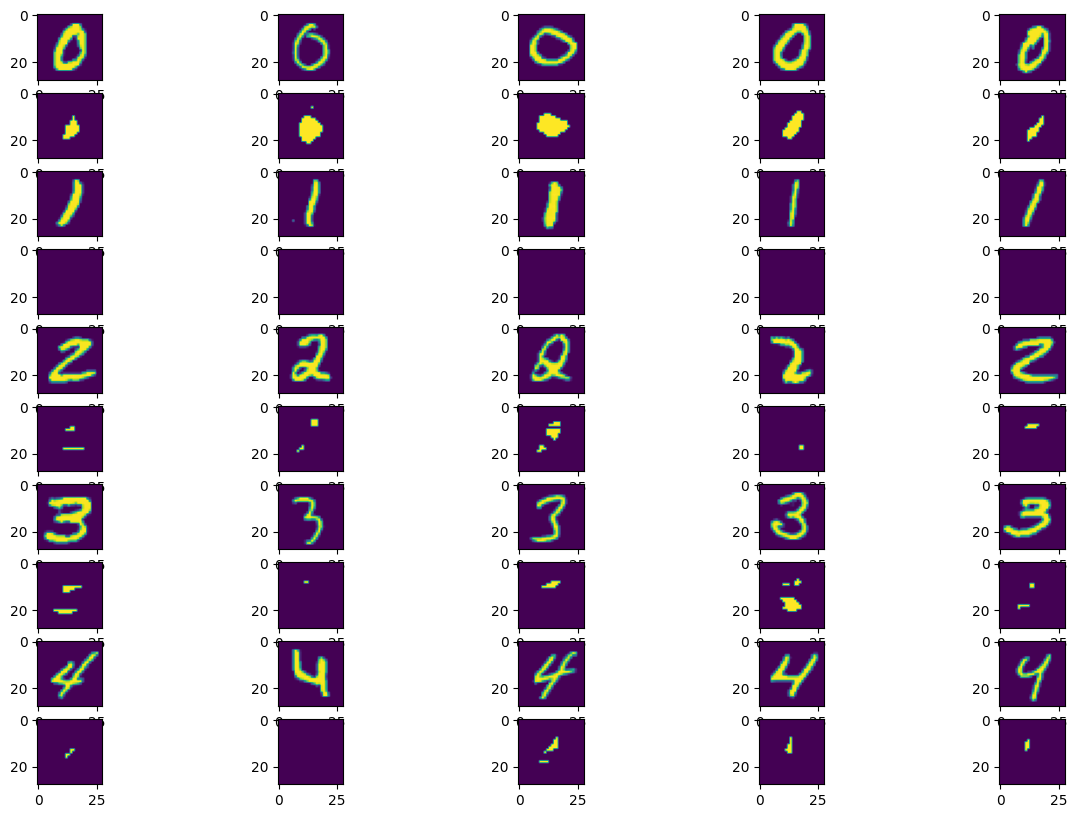

In [75]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(10, 5, figsize=(15, 10))
lst = [no0, no1, no2, no3, no4]  #

for i, data in enumerate(lst):  # Loop over each dataset
    for ii, idx in enumerate(img_ids):  # Loop over each image ID
        axs[i+i, ii].imshow(data[idx, :, :])
        axs[i + i + 1, ii].imshow(getHolePixels(data[idx, :, :]))

#plt.tight_layout()
plt.show()


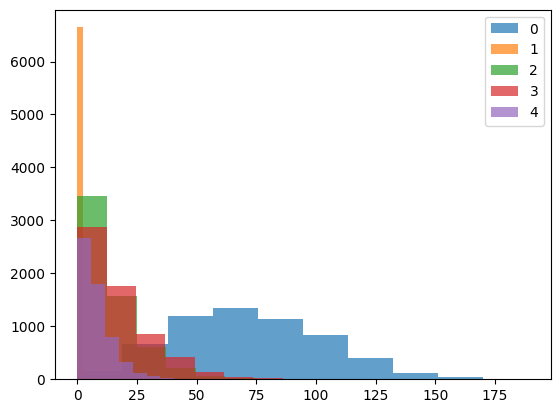

In [87]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole3 = np.array([getHolePixels(i).sum() for i in no3])
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole4 = np.array([getHolePixels(i).sum() for i in no4])

plt.hist(hole0, alpha=0.7)
plt.hist(hole1, alpha=0.7)
plt.hist(hole2, alpha=0.7)
plt.hist(hole3, alpha=0.7)
plt.hist(hole4, alpha=0.7)
plt.legend(["0", "1", "2", "3", "4"])
plt.show()

Hole Pixels are also not a good feature for identifying the numbers.

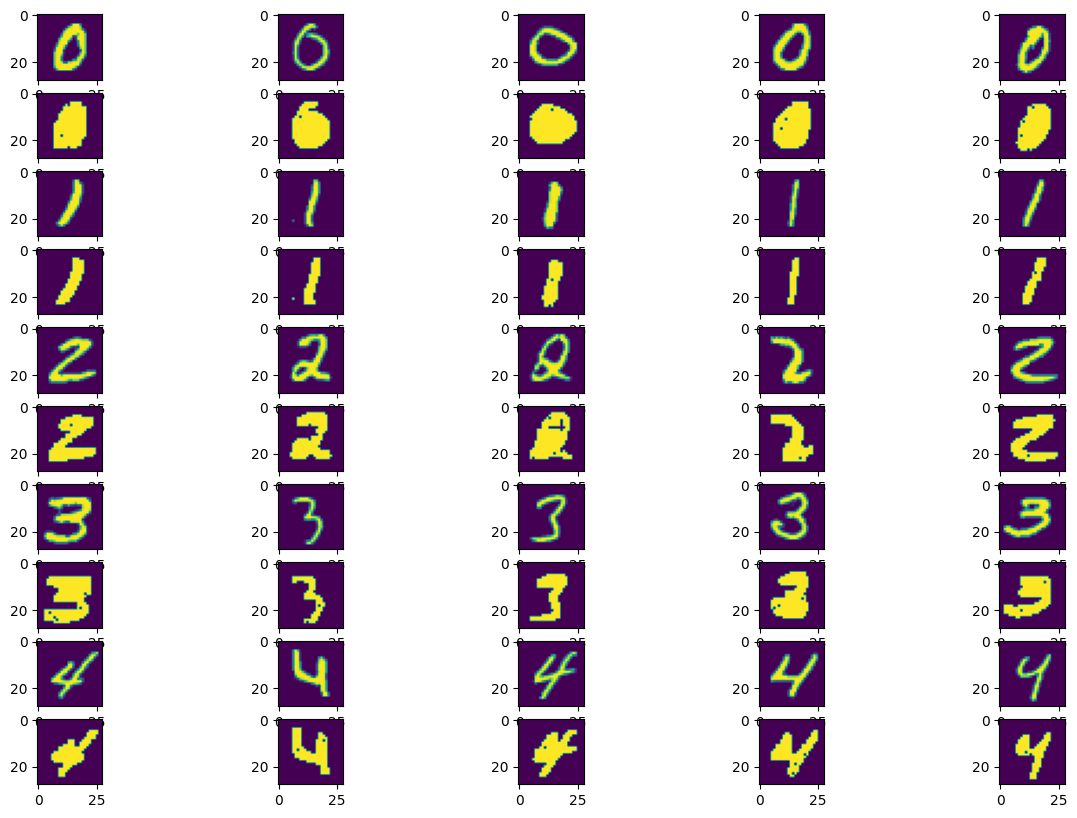

In [77]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(10, 5, figsize=(15, 10))
lst = [no0, no1, no2, no3, no4]  #

for i, data in enumerate(lst):  # Loop over each dataset
    for ii, idx in enumerate(img_ids):  # Loop over each image ID
        axs[i+i, ii].imshow(data[idx, :, :])
        axs[i + i + 1, ii].imshow(getHullPixels(data[idx, :, :]))

#plt.tight_layout()
plt.show()


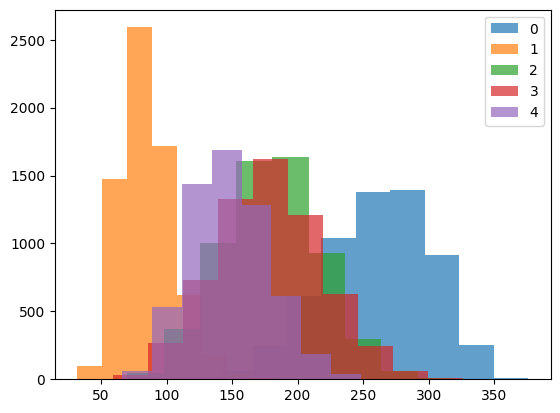

In [89]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])
hull3 = np.array([getHullPixels(i).sum() for i in no3])
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull4 = np.array([getHullPixels(i).sum() for i in no4])

plt.hist(hull0, alpha=0.7)
plt.hist(hull1, alpha=0.7)
plt.hist(hull2, alpha=0.7)
plt.hist(hull3, alpha=0.7)
plt.hist(hull4, alpha=0.7)
plt.legend(["0", "1", "2", "3", "4"])
plt.show()

Slightly better than Hole pixels but still has many overlapping features. This will give low accuracy.


We will try boundry pixels of the image to see if we can get better model

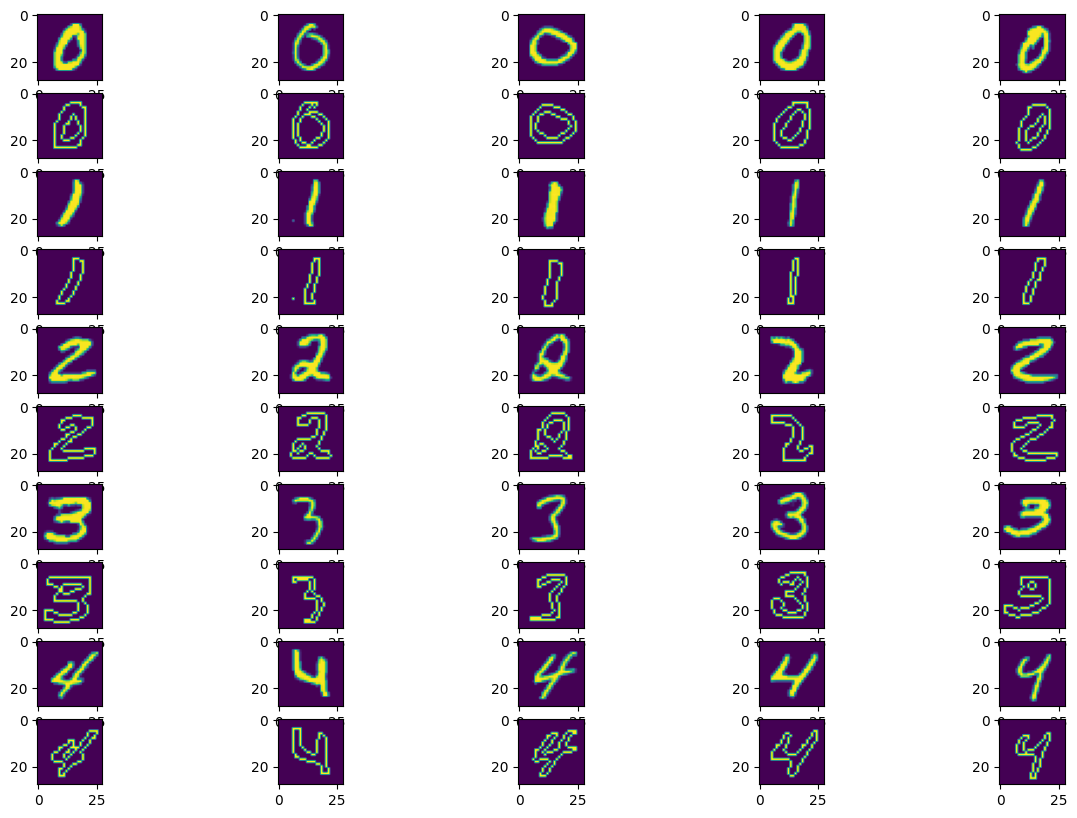

In [79]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(10, 5, figsize=(15, 10))
lst = [no0, no1, no2, no3, no4]  #

for i, data in enumerate(lst):  # Loop over each dataset
    for ii, idx in enumerate(img_ids):  # Loop over each image ID
        axs[i+i, ii].imshow(data[idx, :, :])
        axs[i + i + 1, ii].imshow(getBoundaryPixels(data[idx, :, :]))

#plt.tight_layout()
plt.show()


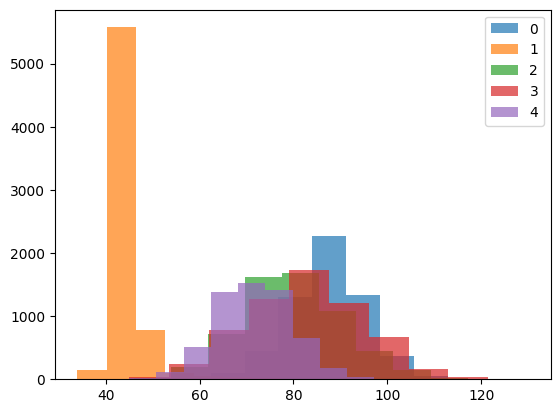

In [86]:
boundry1 = np.array([getBoundaryPixels(i).sum() for i in no1])
boundry0 = np.array([getBoundaryPixels(i).sum() for i in no0])
boundry3 = np.array([getBoundaryPixels(i).sum() for i in no3])
boundry2 = np.array([getBoundaryPixels(i).sum() for i in no2])
boundry4 = np.array([getBoundaryPixels(i).sum() for i in no4])

plt.hist(boundry0, alpha=0.7)
plt.hist(boundry1, alpha=0.7)
plt.hist(boundry2, alpha=0.7)
plt.hist(boundry3, alpha=0.7)
plt.hist(boundry4, alpha=0.7)
plt.legend(["0", "1", "2", "3", "4"])
plt.show()

Only able to distinguish 1

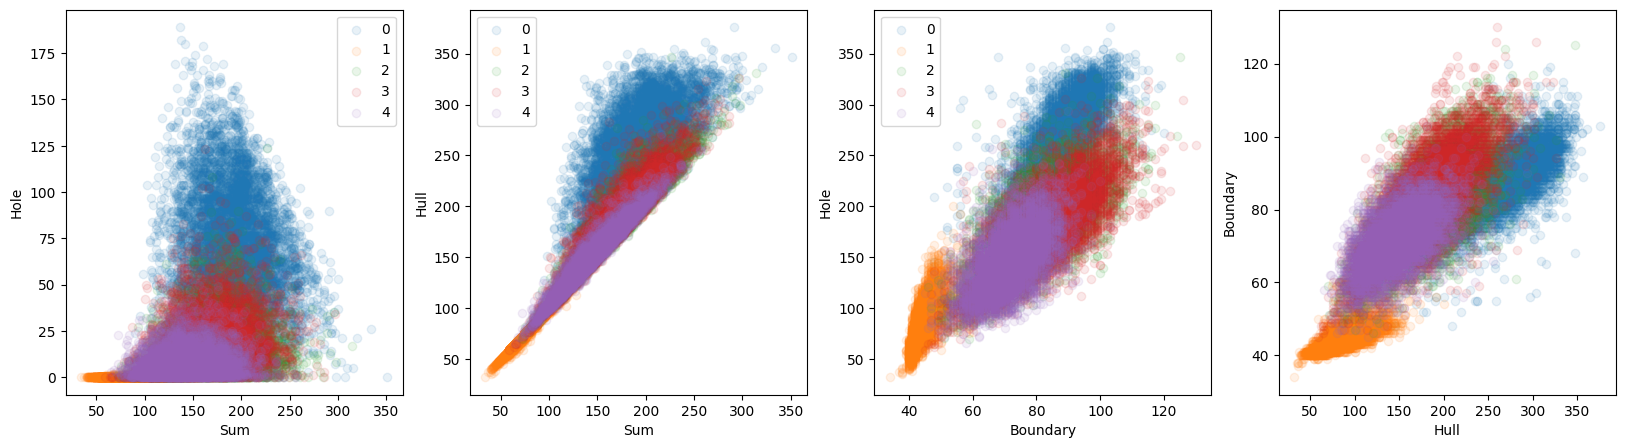

In [95]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
sm = [sum0, sum1, sum2, sum3, sum4]
lst1 = [hole0, hole1, hole2, hole3, hole4]
lst2 = [hull0, hull1, hull2, hull3, hull4]
lst3 = [boundry0, boundry1, boundry2, boundry3, boundry4]

for i in zip(sm, lst1):
    axs[0].scatter(i[0], i[1], alpha=0.1)

axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hole")
axs[0].legend(["0", "1", "2", "3", "4"])

for i in zip(sm, lst2):
    axs[1].scatter(i[0], i[1], alpha=0.1)

axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hull")
axs[1].legend(["0", "1", "2", "3", "4"])

for i in zip(lst3, lst2):
    axs[2].scatter(i[0], i[1], alpha=0.1)

axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend(["0", "1", "2", "3", "4"])

for i in zip(lst2, lst3):
    axs[3].scatter(i[0], i[1], alpha=0.1)

axs[3].set_xlabel("Hull")
axs[3].set_ylabel("Boundary")

plt.show()

We can try combining 3 featues

In [91]:
cl0 = ["class 0"] * len(sum0)
cl1 = ["class 1"] * len(sum1)
cl2 = ["class 2"] * len(sum2)
cl3 = ["class 3"] * len(sum3)
cl4 = ["class 4"] * len(sum4)
df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole1, hole0, hole2, hole3, hole4)),
            np.concatenate((sum1, sum0, sum2, sum3, sum4)),
            np.concatenate((boundry1, boundry0, boundry2, boundry3, boundry4)),
            np.concatenate((cl1, cl0, cl2, cl3, cl4)),
        )
    ),

    columns=["Hole", "Sum", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()

Using Hull pixel instead of sum

In [94]:
cl0 = ["class 0"] * len(sum0)
cl1 = ["class 1"] * len(sum1)
cl2 = ["class 2"] * len(sum2)
cl3 = ["class 3"] * len(sum3)
cl4 = ["class 4"] * len(sum4)
df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole1, hole0, hole2, hole3, hole4)),
            np.concatenate((hull1, hull0, hull2, hull3, hull4)),
            np.concatenate((boundry1, boundry0, boundry2, boundry3, boundry4)),
            np.concatenate((cl1, cl0, cl2, cl3, cl4)),
        )
    ),

    columns=["Hole", "Hull", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Hull", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()